In [15]:
import numpy as np
import matplotlib.pyplot as plt
import glob, datetime
from tqdm import tqdm
import os

src_dir = "data/metrics/"
data_dir = "/home/mkim/Nserver/climate_neural_processes/data/SPCAM5"

In [14]:
# Plot histograms for different levels

In [39]:
def sort_fn(filename):
    date_string = filename[-14:-4]
    datetime_object = datetime.datetime.strptime(date_string, "%Y-%m-%d")
    return datetime_object

def plot_bar(level, split):
    """
        levels: 0 = all, 1~26
        split: train, valid, test
    """
    file_name = os.path.join(src_dir, split + "bar.png")
    if os.path.exists(file_name):
        return file_name

    x_paths = sorted(glob.glob(f"{data_dir}/inputs_*"), key=sort_fn)
    y_paths = sorted(glob.glob(f"{data_dir}/outputs_*"), key=sort_fn)

    for i, (x_path, y_path) in enumerate(pbar := tqdm(zip(x_paths, y_paths), total=len(x_paths))):
        x = np.load(x_path)
        y = np.load(y_path)[:, :26]
        x = x.reshape(-1, 96, 144, 108)
        plt.imshow(x[0, :, :, level])

        plt.show()
        
        x = x.reshape(-1, 108)
        print(x.max(0))
        plt.bar(np.arange(108), x.mean(axis=0))
        plt.show()
        print(x.shape)
        break

  0%|          | 0/727 [00:00<?, ?it/s]

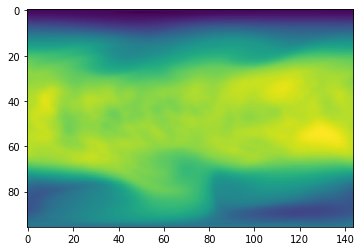

[2.4144415e+02 2.3589404e+02 2.3136693e+02 2.2789221e+02 2.2727385e+02
 2.2707332e+02 2.2808163e+02 2.2801918e+02 2.2776656e+02 2.2835374e+02
 2.3057799e+02 2.3208925e+02 2.3263268e+02 2.3340700e+02 2.4129308e+02
 2.5001033e+02 2.5831195e+02 2.6649829e+02 2.7481995e+02 2.8093259e+02
 2.8832880e+02 2.9369098e+02 2.9909445e+02 3.0467419e+02 3.0851480e+02
 3.1562378e+02 1.8390928e-06 1.9793097e-06 2.7278732e-06 4.7171420e-06
 5.6487606e-06 1.4011569e-05 3.7387083e-06 1.9600550e-06 3.3054835e-06
 7.9106776e-06 2.4501334e-05 6.8793990e-05 1.7603261e-04 3.8616545e-04
 8.5738831e-04 1.7141420e-03 3.0623081e-03 4.8179296e-03 6.8141283e-03
 9.0651289e-03 1.1668604e-02 1.4231135e-02 1.6177095e-02 1.9159334e-02
 2.0119967e-02 2.2175919e-02 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.2905270e-36 3.8799666e-34
 1.6773538e-31 6.2739973e-29 1.6493690e-26 1.4665946e-24 1.5926834e-19
 5.7056440e-15 3.8889776e-09 1.6464663e-05 1.0885062e-04 2.0360036e-04
 3.277

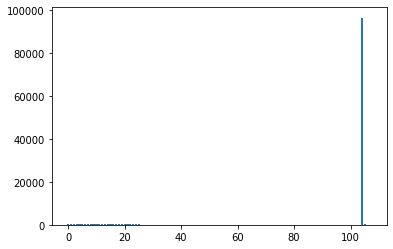

  0%|          | 0/727 [00:00<?, ?it/s]

(331776, 108)


In [40]:
plot_bar(level=0, split="train")